 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/QC.ipynb#Find-the-longest-streak-of-'A'-Nucleotide" data-toc-modified-id="Find-the-longest-streak-of-'A'-Nucleotide-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Find the longest streak of 'A' Nucleotide</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/QC.ipynb#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/QC.ipynb#Total-'A'-count-per-read" data-toc-modified-id="Total-'A'-count-per-read-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Total 'A' count per read</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/QC.ipynb#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/QC.ipynb#Count-DNA-reads-by-pool" data-toc-modified-id="Count-DNA-reads-by-pool-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Count DNA reads by pool</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/QC.ipynb#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/QC.ipynb#Demultiplexing" data-toc-modified-id="Demultiplexing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Demultiplexing</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/QC.ipynb#Count-longest-streak-of-'A'-by-the-pool" data-toc-modified-id="Count-longest-streak-of-'A'-by-the-pool-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Count longest streak of 'A' by the pool</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/QC.ipynb#Poly-A-tail-analysis" data-toc-modified-id="Poly-A-tail-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Poly-A tail analysis</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/QC.ipynb#Consensus-matrix-on-strings-after-poly-A-tail" data-toc-modified-id="Consensus-matrix-on-strings-after-poly-A-tail-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Consensus matrix on strings after poly A tail</a></span></li></ul></div>

In [12]:
# Scientific libraries
import numpy as np
import scipy

# import Pandas

import pandas as pd

# Graphic libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, download_plotlyjs
init_notebook_mode()
import plotly.graph_objs as go

# Extra options 

pd.options.display.max_rows = 10
pd.set_option('max_columns', 50)
sns.set(style='ticks', context='talk')

# Creating alias for magic commands
%alias_magic t time

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Created `%t` as an alias for `%time`.
Created `%%t` as an alias for `%%time`.


In [ ]:
sadfsadf

In [2]:
import pandas as pd
import numpy as np

In [14]:
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1_001.fastq'
lines_count = 160000  # number of lines in a file

list_streak = list()
list_count = list()
list_pool = list()
list_corrected_pool = list()
list_after_polyA = list()


with open(path_to_file, 'r') as f:   # f = open(path_to_file, 'r') # f is a variable with a file
    for current_line in range(lines_count):
        if current_line % 4 == 1:  # pick lines with DNA sequences
            read = f.readline()
            read = read.replace('\n', '')
            
            pool = read[3:7]
            list_streak.append(longest_a_streak(read))
            list_count.append(read.count('A'))
            list_pool.append(pool)
            list_corrected_pool.append(pool_correction(pool, pools))
            list_after_polyA.append(after_polyatail(read))
        else:
            next(f)

In [13]:
def longest_a_streak(dna):
    """find longest streak of A in a string"""
    assert isinstance(dna, str)
    counter = 0 
    longest_streak = 0 #variable must be defined
    for base in dna: 
        if base == 'A':
            counter = counter + 1
            if counter > longest_streak:
                longest_streak = counter
        else:
            counter = 0
    return longest_streak

In [6]:
pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']

In [7]:
def hamming_distance(dna1, dna2):
    assert isinstance(dna1, str)
    assert isinstance(dna2, str)

    distance = 0
    for b1, b2 in zip(dna1, dna2):
        if b1 != b2:
            distance += 1
    return distance

assert hamming_distance('AAAA', 'unknown') == 4

In [8]:
def pool_correction(read_pool, list_of_pools, max_ham_dist = 1):
    """compare given pool against list of pools and correct it"""
    assert isinstance(read_pool, str)
    assert isinstance(list_of_pools, list)
    for p in list_of_pools:
        dist = hamming_distance(p, read_pool)
        if dist == 0:
            return p
        elif dist <= max_ham_dist:
            return p
    return 'unknown'

assert pool_correction('ACAT', pools) == 'ACAG'
assert pool_correction('TTGG', pools) == 'TTGG'
assert pool_correction('MMMM', pools) == 'unknown'
assert pool_correction('ACTA', pools, max_ham_dist=2) == 'ACAG'

In [9]:
def histo(values, plot_title='empty title'):
    """show a histogram based on list"""
    import matplotlib.pyplot as plt
    assert isinstance(values, list)
    plt.bar(range(len(values)), values)
    plt.title(plot_title)
    plt.show()

In [10]:
def after_polyatail(read, next_n_bases=5, min_len_poly_a=8):
    """
    if a poly A tail length is grater than min_len_poly_a
    go to the end of the tail
    and return next n bases
    """
    counter_a = 0
    bases_after_poly_a = str()
    for index, base in enumerate(read):
        if base == 'A':
            counter_a += 1
        else:
            if counter_a > min_len_poly_a:
                bases_after_poly_a = read[index:index + next_n_bases]
            counter_a = 0
    return bases_after_poly_a

In [15]:
# define empty pandas dataframe with column names
df = pd.DataFrame(columns=('streakA', 'countA', 'pool', 'corrected_pool'))
# df.streakA = df.streakA.astype('int')
# df.countA = df.countA.astype('int')
# df.pool = df.pool.astype('str')
# df.corrected_pool = df.corrected_pool.astype('str')

# add to pandas dataframe
df.streakA = list_streak
df.countA = list_count
df.pool = list_pool
df.corrected_pool = list_corrected_pool

In [16]:
df.head()

,streakA,countA,pool,corrected_pool
0,15,28,TTGG,TTGG
1,2,16,ATCA,ATCA
2,2,17,ACAG,ACAG
3,19,31,AGTC,AGTC
4,14,29,ACAG,ACAG


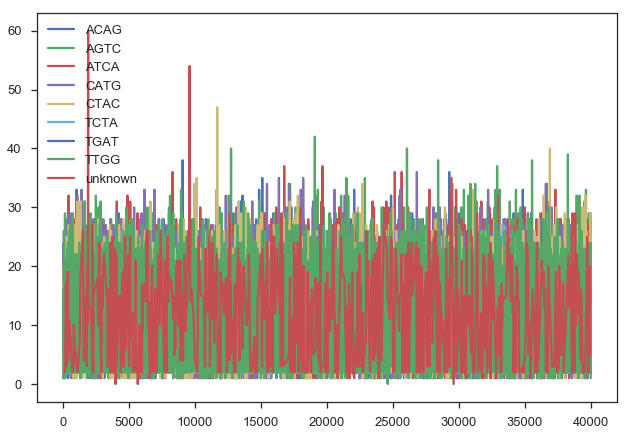

In [40]:
for pool,p in df.groupby(by="corrected_pool"):
    plt.plot(p.streakA, label=pool)
plt.legend()

IndexError: index 10 is out of bounds for axis 0 with size 10

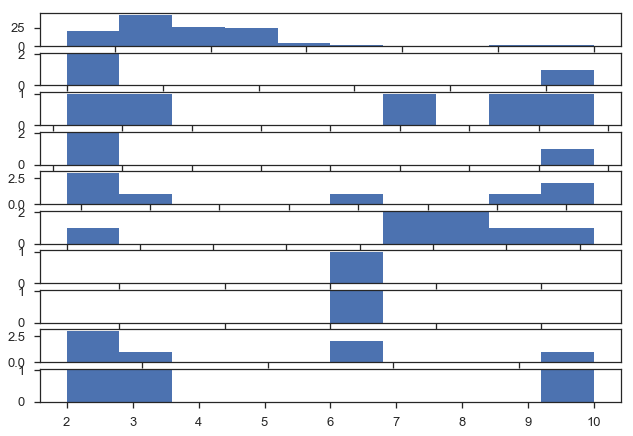

In [36]:
fig, ax = plt.subplots(10)
for i, (pool,p) in enumerate(df.groupby(by="pool")):
    ax[i].hist(p.streakA, label=pool)
plt.legend()

In [39]:
df.pool.head()

0    TTGG
1    ATCA
2    ACAG
3    AGTC
4    ACAG
Name: pool, dtype: object

# Find the longest streak of 'A' Nucleotide

In [30]:
# create a list with 61 zeroes
longest_a_histo = [0 for i in range(61)]

# add +1 to the correponding position when we see an element
# i.e. if we see element 13 in "result", add +1 to position 13 in "longest_a_histo"
for r in list_streak:# Find the longest streak of 'A' Nucleotide
    longest_a_histo[r] += 1


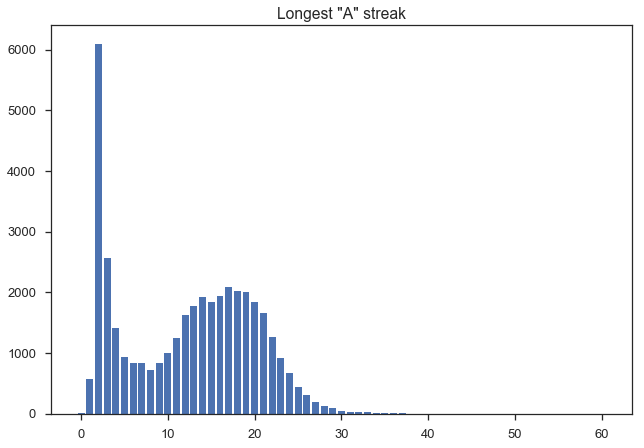

In [31]:
histo(longest_a_histo, 'Longest "A" streak')

## Conclusion
- The most "popular" A streak is of length 2 (it can be found in >6000 reads out of 40k)
- The most common A streak is of length 10-25 


# Total 'A' count per read

In [28]:
# create a list with 61 zeroes
total_a_histo = [0 for i in range(61)]

# add +1 to the correponding position when we see an element
# i.e. if we see element 13 in "result", add +1 to position 13 in "longest_a_histo"
for r in list_count:
    total_a_histo[r] += 1


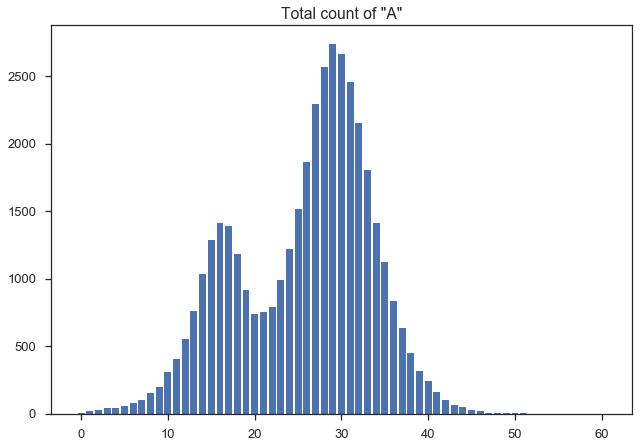

In [29]:
histo(total_a_histo, plot_title='Total count of "A"')

## Conclusion
- The most "popular" A streak is of length 2 (it can be found in >6000 reads out of 40k)
- The most common A streak is of length 10-25 


# Count DNA reads by pool 

Pool barcode is located in the beginning of the read. Let's calculate what pools we have 

In [17]:
from collections import Counter
possible_pools = Counter(list_pool).most_common(10)
for idx, pool in enumerate(possible_pools, start=1):
    print(idx, pool)

1 ('CTAC', 7194)
2 ('AGTC', 7039)
3 ('CATG', 6634)
4 ('ACAG', 6374)
5 ('ATCA', 5960)
6 ('TTGG', 5564)
7 ('AAAA', 120)
8 ('TGGA', 40)
9 ('TTTT', 33)
10 ('ACAA', 32)


In [18]:
pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']

In [19]:
set([pool for pool, _ in possible_pools]) - set(pools)

{'AAAA', 'ACAA', 'TGGA', 'TTTT'}

In [20]:
d = {
'ACAG': 0,
'AGTC': 0,
'ATCA': 0,
'CATG': 0,
'CTAC': 0,
'TCTA': 0,
'TGAT': 0,
'TTGG': 0,
'unknown': 0
}

# # or we can create this dict ourselves
# pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']
# {pool: 0 for pool in pools}

In [21]:
for pool in list_pool:
    if pool in d.keys():
        d[pool] += 1
    else:
        d['unknown'] += 1
        

In [22]:
d

{'ACAG': 6374,
 'AGTC': 7039,
 'ATCA': 5960,
 'CATG': 6634,
 'CTAC': 7194,
 'TCTA': 1,
 'TGAT': 0,
 'TTGG': 5564,
 'unknown': 1234}

In [23]:
def plot_from_dict(d, plot_title='empty title'):
    assert isinstance(d, dict)
    # order in a dict is not guaranteed, so we may get weird results
    plt.bar(range(len(d.keys())),d.values())
    plt.xticks(range(len(d)), list(sorted(d.keys())))
    plt.title(plot_title)

    plt.show()

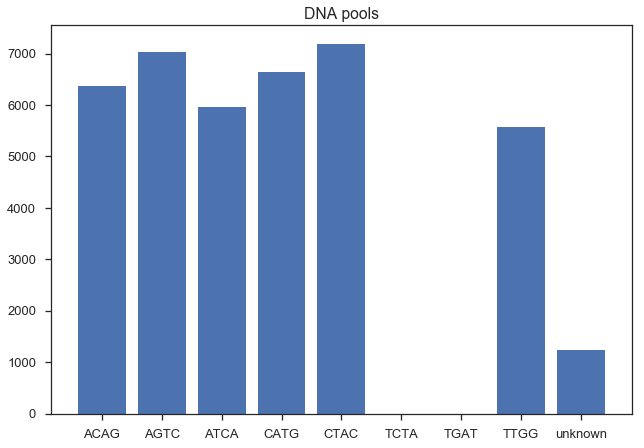

In [24]:
plot_from_dict(d, 'DNA pools')

## Conclusion
- 2 given pools from the wet lab were not found 

# Demultiplexing

In [25]:
# 1 initialize dict
# 2 add corrected pools
# 3 plot

import plotly.plotly as py
import plotly.graph_objs as go

data = list()
for hamming_dist in range(3):
    d = {
    'ACAG': 0,
    'AGTC': 0,
    'ATCA': 0,
    'CATG': 0,
    'CTAC': 0,
    'TCTA': 0,
    'TGAT': 0,
    'TTGG': 0,
    'unknown': 0
    }


    for pool in list_pool:
        pool = pool_correction(pool, pools, hamming_dist)
        d[pool] += 1
    keys, values = zip(*d.items())

    trace = go.Bar(
        x=keys,
        y=values,
        name='Hamming distance of ' + str(hamming_dist)
    )
    data.append(trace)

#     plot_from_dict(d, plot_title= "Hamming distance of " + str(hamming_dist))
py.iplot(data, filename = 'basic-line')

# Count longest streak of 'A' by the pool

In [26]:
pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']

# create a dictionary with keys as strings from pools and for values empty list with 61 zeroes
d = {k: list(0 for i in range(61)) for k in pools}

In [27]:
for pool in list_pool:
    pool = read[3:7]
    streak = longest_a_streak(read) 
    if pool in d.keys():
        streak_count = d[pool]  # initially list with 61 0's
        streak_count[streak] += 1 # add +1 to the correponding position when we see an element
                # i.e. if we see element with A streak of 13 in "streak", add +1 to position 13 in "streak_count"
    else:
        streak_count = d['unknown']
        streak_count[streak] += 1

In [ ]:
list_pool

# Poly-A tail analysis

In [ ]:
def after_polyatail(read, next_n_bases=5, min_len_poly_a=8):
    """
    if a poly A tail length is grater than min_len_poly_a
    go to the end of the tail
    and return next n bases
    """
    counter_a = 0
    bases_after_poly_a = str()
    for index, base in enumerate(read):
        if base == 'A':
            counter_a += 1
        else:
            if counter_a > min_len_poly_a:
                bases_after_poly_a = read[index:index + next_n_bases]
            counter_a = 0
    return bases_after_poly_a

In [ ]:
assert after_polyatail("AAAAAAAAAAAAAAAAAAAAAATCCCCCCCCCCCC", next_n_bases=5, min_len_poly_a=8) == 'TCCCC'
assert after_polyatail("ACACAT", next_n_bases=5, min_len_poly_a=8) == ''

In [ ]:
from collections import Counter

for i in range(1,11):
    after_a = list()
    for read in list_after_polyA:
        if read != '': # read didn't have min polyA tail -> returns ''
            after_a.append(read)
    print(Counter(after_a).most_common(6))


# Consensus matrix on strings after poly A tail

In [ ]:
# create a matrix with 5 rows and 10 columns, where every element is 0
artefact_length = 13
matrix = [[0 for i in range(artefact_length)] for i in range(5)]
matrix

In [4]:
df.head()

NameError: name 'df' is not defined